![alt text](monash.jpg "Title")


# Assignment 2 - FIT5196 - Data Wrangling
### Mohamed Hayath Mohaab Hassan
### 29626888
### mmoh0064@student.monash.edu

# Data cleaning
### Introduction
#### Data cleansing is defined as the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database. Data cleansing can also be referred to as data cleaning, data scrubbing, or data reconciliation. More precisely, the process of data cleansing could be explained as a four stage process:

#### 1] Define and identify errors in data such as incompleteness, incorrectness, inaccuracy or irrelevancy
#### 2]Clean and rectify these error by replacing, modifying, or deleting them
#### 3] Document error instances and error types; and finally
#### 4] Measure and verify to see whether the cleansing meets the user’s specified tolerance limits in terms of cleanliness.

#### This can be classified into mainly 3 types of errors which are,
#### Syntactical Anomalies: describe characteristics concerning the format and values used for representation of the entities. Syntactical anomalies such as: lexical errors, domain format errors, syntactical error and irregularities.
#### Semantic Anomalies: hinder the data collection from being a comprehensive and non-redundant representation of the mini-world. These types of anomalies include: Integrity constraint violations, contradictions, duplicates and invalid tuples.
#### Coverage Anomalies: decrease the amount of entities and entity properties from the mini-world that are represented in the data collection. Coverage anomalies are categorised as: missing values and missing tuples.

#### First import all the libraries required for the assignment

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from datetime import time
from datetime import datetime
from datetime import timedelta
import numpy as np
import networkx as nx
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

These libraries were used for the following purposes:

- **Pandas**: 
The pandas library has been used to construct a dataframe to work on the dataset provided. This library has a few methods that will be useful for manipulating the data given and provide a result.
- **Matplotlib**
Used to create scatter plots
- **numpy**
Used for various operations on the dataframe elements as well as NaN values
- **DateTime**
Used to strip and strafe date time objects
- **Seaborn**
Used to create regression and correlation plots
- **Networkx**
Used for data structures for graphs and applying dijsktra's algorithm to return distance and time 
- **SKLearn**
Used primarily for Linear Regression and Train and Test Models

#### We first load the data to a pandas dataframe using the read_csv command from pandas and display the first 5 rows of the dataframe using dataframe.head()

In [2]:
data = pd.read_csv('29626889_dirty_data.csv')
data.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID1272192556,0,5,4,-37.804867,144.935379,-37.808569,144.992514,5332.0,2018-05-23,23:26:20,1324.80,23:48:24,16.87
1,ID5889593186,2,6,2,-37.773803,144.983647,-37.817560,144.932226,10514.0,2018-02-28,08:34:59,3166.68,9:27:45,314.27
2,ID1723151852,0,9,3,-38.110916,144.654173,-37.821652,144.983389,45282.0,2018-06-08,21:56:20,10926.30,0:58:26,35.47
3,ID1411037924,0,9,7,-38.110916,144.654173,-37.861835,144.905716,50805.1,2018-03-19,16:32:47,13204.98,20:12:51,34.35
4,ID1365225641,0,9,8,-38.110916,144.654173,-37.807202,145.026637,49774.6,2018-02-08,13:24:04,12099.66,16:45:43,31.76


In [3]:
dirty_old_cols = list(data.columns.values)
dirty_old_cols

['Unnamed: 0',
 'Uber Type',
 'Origin Region',
 'Destination Region',
 'Origin Latitude',
 'Origin Longitude',
 'Destination Latitude',
 'Destination Longitude',
 'Journey Distance(m)',
 'Departure Date',
 'Departure Time',
 'Travel Time(s)',
 'Arrival Time',
 'Fare$']

#### The dataset consists of 327 rows and 14 columns

In [4]:
data.shape

(327, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 14 columns):
Unnamed: 0               327 non-null object
Uber Type                327 non-null int64
Origin Region            327 non-null int64
Destination Region       327 non-null int64
Origin Latitude          327 non-null float64
Origin Longitude         327 non-null float64
Destination Latitude     327 non-null float64
Destination Longitude    327 non-null float64
Journey Distance(m)      327 non-null float64
Departure Date           327 non-null object
Departure Time           327 non-null object
Travel Time(s)           327 non-null float64
Arrival Time             327 non-null object
Fare$                    327 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 35.8+ KB


 - Categorical and Numerical variables of the dataset.
    1. **Categorical Variables**
        - Uber Type (0,1 or 2)
        - Origin Region (9 distinct values)
        - Destination Region (9 distinct values)
        - ID (distinct values) 
<br><br>
    2. **Numerical Values** 
        - Origin Latitude
        - Origin Longitude
        - Destination Latitude
        - Destination Longitude
        - Journey Distance
        - Departure Date
        - Departure Time
        - Travel Time
        - Arrival Time
        - Fare$

- Description of the dataframe

In [6]:
data.describe()

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,0.767584,5.067278,4.987768,-36.690691,144.933022,-36.683637,144.938320,15441.516208,4065.089419,73.904709
std,0.722845,2.609868,2.487978,9.307185,0.109935,9.305893,0.094446,16121.765694,3886.257647,160.408144
min,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,1404.000000,325.200000,4.840000
25%,0.000000,3.000000,3.000000,-37.821942,144.928220,-37.824772,144.925202,5234.500000,1327.470000,16.120000
50%,1.000000,5.000000,5.000000,-37.814659,144.961075,-37.815294,144.956017,9139.000000,2710.800000,22.090000
75%,1.000000,7.000000,7.000000,-37.805603,144.995913,-37.805959,144.985865,13365.500000,4044.240000,39.145000
max,3.000000,9.000000,9.000000,38.110916,145.046450,38.110916,145.046450,51032.000000,13204.980000,1268.010000


The description of the database tells us a few important things:
- The total number of samples is 327
- Uber Type is a categorical variable with 0,1,2 or 3 values(which is actually an error as specified in the specifications)
- Origin and destination regions is a categorical variables with values ranging from 1-9
- There is an anomaly is Origin latitude and Destination latitude as seen from its maximum value

#### There are no missing values in this file as seen below

In [7]:
data.isnull().sum()

Unnamed: 0               0
Uber Type                0
Origin Region            0
Destination Region       0
Origin Latitude          0
Origin Longitude         0
Destination Latitude     0
Destination Longitude    0
Journey Distance(m)      0
Departure Date           0
Departure Time           0
Travel Time(s)           0
Arrival Time             0
Fare$                    0
dtype: int64

### To make it easy to read the data, I renamed my column names 

In [8]:
data.columns = ['ID','Uber_type', 'Origin_region', 'Destination_region','Origin_latitude','Origin_longitude','Destination_latitude','Destination_longitude','Distance','Departure_date','Departure_time','Travel_time','Arrival_time','Fare']

### We begin by correcting syntactical anomalies

#### We check if our departure date is in the right format
#### On inspecting the data, I found that some dates are not in the right format as the code below shows.

In [9]:
# correct the format of all the dates
data['Departure_date'] = data['Departure_date'].replace(to_replace=r'-', value='/', regex=True)
# split the date to year , month and day
date_parts = data['Departure_date'].apply(lambda d: pd.Series(int(n) for n in d.split('/')))
date_parts.columns = ['year','month','day']
# correct the day
print(date_parts[date_parts['day']>28])
print(date_parts[date_parts['month']>12])


     year  month  day
216  2018      6   31
223  2018      6   31
226  2018      6   31
227  2018      4   31
232  2018      4   31
233  2018      4   31
235  2018      6   31
238  2018      6   31
241  2018      4   31
242  2018      2   30
     year  month  day
188  2018     28    2
191  2018     23    5
196  2018     18    1
197  2018     27    2
198  2018     17    4
203  2018     24    6
205  2018     18    3
207  2018     16    5


#### There are two types of errors
- Errors related to number of days in a month :- As we can see February has 30 days and June and April has 31 days 
- For some entries, month and day column have been swapped

In [10]:
# February date in invalid format as in 30/02/2018, changed to 28/02/2018
date_parts['day'][date_parts.day == 30] = 28
# June and April have 30 days but displayed as 31/06/2018 or 31/04/2018, hence performed corrections
date_parts['day'][date_parts.day == 31] = 30
print(date_parts[date_parts['day']>=28])

     year  month  day
1    2018      2   28
24   2018      6   28
64   2018      3   28
128  2018      1   28
216  2018      6   30
220  2018      3   28
223  2018      6   30
226  2018      6   30
227  2018      4   30
232  2018      4   30
233  2018      4   30
235  2018      6   30
238  2018      6   30
241  2018      4   30
242  2018      2   28
287  2018      5   28
299  2018      4   28


In [11]:
# correct the months, the day and the month values are interchanged
print(date_parts[date_parts['month']>12])
date_parts.loc[date_parts.month == 28, ['month', 'day']] = [2,28]
date_parts.loc[date_parts.month == 23, ['month', 'day']] = [5,23]
date_parts.loc[date_parts.month == 18, ['month', 'day']] = [1,18]
date_parts.loc[date_parts.month == 27, ['month', 'day']] = [2,27]
date_parts.loc[date_parts.month == 17, ['month', 'day']] = [4,17]
date_parts.loc[date_parts.month == 24, ['month', 'day']] = [6,24]
date_parts.loc[date_parts.month == 18, ['month', 'day']] = [3,18]
date_parts.loc[date_parts.month == 16, ['month', 'day']] = [5,16]


     year  month  day
188  2018     28    2
191  2018     23    5
196  2018     18    1
197  2018     27    2
198  2018     17    4
203  2018     24    6
205  2018     18    3
207  2018     16    5


In [12]:
# correct the months, the day and the month values are interchanged
print(date_parts[date_parts['month']>12])


Empty DataFrame
Columns: [year, month, day]
Index: []


##### Thus, there are no more rows in our data with an incorrect date format.

In [13]:
data['Departure_date'] = pd.to_datetime(date_parts)

## Semantic Anomalies

### - Duplicated Rows
#### We first begin by checking if our ID is unique

In [14]:
data.ID.nunique()

327

##### As we have 327 rows in our data and we have 327 IDs, we can confirm that all the IDs are unique

### - Uber type
#### Next, we check if our uber types are consistent as in the specifications provided.

In [15]:
data[(data.ID.str.contains('^ID1'))].head(15)

,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare
0,ID1272192556,0,5,4,-37.804867,144.935379,-37.808569,144.992514,5332.0,2018-05-23,23:26:20,1324.80,23:48:24,16.87
2,ID1723151852,0,9,3,-38.110916,144.654173,-37.821652,144.983389,45282.0,2018-06-08,21:56:20,10926.30,0:58:26,35.47
3,ID1411037924,0,9,7,-38.110916,144.654173,-37.861835,144.905716,50805.1,2018-03-19,16:32:47,13204.98,20:12:51,34.35
4,ID1365225641,0,9,8,-38.110916,144.654173,-37.807202,145.026637,49774.6,2018-02-08,13:24:04,12099.66,16:45:43,31.76
8,ID1412783654,0,6,9,-37.790818,144.985793,-38.110916,144.654173,47186.0,2018-02-22,11:53:03,11418.06,15:03:21,26.12
13,ID1781267046,0,8,5,-37.807202,145.026637,-37.800539,144.934642,10179.0,2018-01-22,11:06:04,2622.60,11:49:46,9.69
14,ID1738908218,0,6,3,-37.818711,144.916772,-37.810946,144.978049,6120.0,2018-01-08,07:01:13,1586.82,7:27:39,7.03
15,ID1206206424,0,5,3,-37.799041,144.960088,-37.823384,144.970383,3096.0,2018-01-11,22:45:38,837.60,22:59:35,16.42
18,ID1719287330,0,6,6,-37.819411,144.932424,-37.790818,144.985793,7442.0,2018-06-04,16:33:40,1899.96,17:05:19,12.45
19,ID1915397981,0,9,1,-38.110916,144.654173,-37.819643,144.960198,43132.0,2018-07-26,19:35:49,10407.54,22:29:16,28.48


In [16]:
data[(data.ID.str.contains('^ID3'))].head(15)

,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare
5,ID3774698802,1,1,4,-37.812487,144.963292,-37.802133,145.004145,4465.0,2018-05-01,03:04:39,1165.74,3:24:04,19.39
6,ID3717761408,1,6,7,-37.773803,144.983647,-37.861835,144.905716,16033.0,2018-05-24,15:04:15,5323.56,16:32:58,33.37
7,ID3872668405,1,9,1,-38.110916,144.654173,-37.804451,144.943278,43274.0,2018-05-26,10:03:41,10376.58,12:56:37,56.90
9,ID3821429000,1,7,2,-37.861835,144.905716,-37.814591,144.946957,9382.5,2018-07-06,00:29:14,3149.52,1:21:43,29.21
10,ID3285161197,1,8,1,-37.815834,145.046450,-37.818494,144.944214,9836.6,2018-04-09,12:53:36,2780.52,13:39:56,22.89
12,ID3627839221,1,5,2,-37.801661,144.935624,-37.814967,144.945125,4597.0,2018-02-04,18:52:25,1100.16,19:10:45,20.56
16,ID3402429948,1,9,3,-38.110916,144.654173,-37.816088,144.972228,44262.0,2018-03-18,05:45:44,10696.68,8:44:00,63.95
17,ID3739010668,1,4,4,-38.110916,144.654173,-37.815214,145.005981,47532.0,2018-03-14,02:05:49,11437.62,5:16:26,65.84
21,ID3550617122,1,1,2,-37.816568,144.966664,-37.817062,144.931744,3933.0,2018-05-15,04:20:29,994.86,4:37:03,18.43
22,ID3657790575,1,2,7,-37.815834,145.046450,-37.861835,144.905716,15151.0,2018-02-08,03:41:23,4917.48,5:03:20,35.75


In [17]:
data[(data.ID.str.contains('^ID5'))].head(15)

,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare
1,ID5889593186,2,6,2,-37.773803,144.983647,-37.817560,144.932226,10514.0,2018-02-28,08:34:59,3166.68,9:27:45,314.27
11,ID5759071441,2,8,5,-37.807202,145.026637,-37.804960,144.931549,9765.0,2018-03-25,00:46:23,2523.60,1:28:26,277.17
23,ID5476117767,2,7,2,-37.861835,144.905716,-37.823740,144.935313,10012.0,2018-03-27,09:38:14,3325.74,10:33:39,329.03
31,ID5207720317,2,9,7,-38.110916,144.654173,-37.861835,144.905716,50797.0,2018-04-02,10:46:24,13204.98,14:26:28,1268.01
36,ID5267892152,2,6,7,-37.790818,144.985793,-37.861835,144.905716,11712.0,2018-03-10,12:31:09,3717.48,13:33:06,380.22
45,ID5670710856,2,8,4,-37.815834,145.046450,-37.799989,144.988858,6272.0,2018-05-26,23:09:16,1932.96,23:41:28,220.36
47,ID5471968960,2,4,9,-37.807410,145.010535,-38.110916,144.654173,48228.0,2018-01-01,13:49:05,11663.34,17:03:28,1129.98
76,ID5462590883,2,2,6,-37.820597,144.948816,-37.773845,144.983689,6829.0,2018-03-24,19:43:45,1483.26,20:08:16,166.71
87,ID5723087832,2,6,5,-37.773845,144.983689,-37.808733,144.925161,8075.0,2018-03-27,21:13:20,1820.10,21:43:40,201.03
92,ID5740816201,2,9,3,-38.110916,144.654173,-37.812368,144.987096,45761.0,2018-02-24,08:45:36,11051.94,11:48:56,1066.34


#### We can see that all the IDs that begin with 1 belong to uber type 0, IDs that begin with 3 belong to uber type 1 and IDs which begin with 5 belong to uber type 2

In [18]:
data[(data.ID.str.contains('^ID1'))&(data.Uber_type != 0)]

,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare
135,ID1380775559,3,6,8,-37.790818,144.985793,-37.815834,145.046450,7471.0,2018-04-22,23:04:29,2192.70,23:41:01,21.90
148,ID1917612316,2,5,2,-37.818736,144.916624,-37.812418,144.936911,2680.0,2018-03-11,11:20:55,737.34,11:33:12,10.43
150,ID1201611850,2,1,7,-37.802784,144.950418,-37.861835,144.905716,10041.0,2018-03-21,01:59:59,3325.08,2:55:24,19.82
154,ID1547629704,1,1,6,-37.802889,144.947676,-37.773803,144.983647,8432.0,2018-04-27,19:45:38,2639.34,20:29:37,14.86


In [19]:
data[(data.ID.str.contains('^ID3'))&(data.Uber_type != 1)]

,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare
130,ID3511326626,3,5,7,-37.813011,144.933610,-37.861835,144.905716,11359.0,2018-05-05,07:36:23,3712.38,8:38:15,25.69
134,ID3575031305,2,1,8,-37.821075,144.969444,-37.815834,145.046450,7799.0,2018-06-15,12:21:56,2326.56,13:00:42,20.73


In [20]:
data[(data.ID.str.contains('^ID5'))&(data.Uber_type != 2)]

,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare


#### From the above analysis, we can see that there is some discrepancy in the uber type as it is not consistent with the ID. This is corrected from the code below

In [21]:
data.loc[(data.ID.str.contains('^ID1')), 'Uber_type'] = 0
data.loc[(data.ID.str.contains('^ID3')), 'Uber_type'] = 1
data.loc[(data.ID.str.contains('^ID5')), 'Uber_type'] = 2

### Origin and Destination Latitude and Longitude
 ##### As we have been told that the uber rides are in Victoria, Victoria's Latitude and longitude coordinates are: -37.020100, 144.964600. Any values in these four fields that lie outside these values and its proximities and incorrect and have to be corrected. 

In [22]:
data[data['Origin_latitude'] > 0]

,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare
42,ID3848839834,1,6,4,37.790797,144.985865,-37.803976,145.005478,3210.0,2018-05-09,23:32:29,895.74,23:47:24,18.41
51,ID3555306163,1,3,2,37.822991,144.976257,-37.814824,144.937649,4242.0,2018-02-01,21:32:18,1038.00,21:49:36,19.39
57,ID1171139168,0,9,7,38.110916,144.654173,-37.861835,144.905716,50797.0,2018-05-23,22:52:07,13204.98,2:32:11,39.25
58,ID1307292782,0,3,1,37.816723,144.976921,-37.820864,144.947485,2913.0,2018-06-19,14:40:40,734.64,14:52:54,10.49
59,ID1509682017,0,7,6,37.861835,144.905716,-37.787433,144.980377,11633.0,2018-04-01,20:54:04,3645.30,21:54:49,20.18


In [23]:
data.loc[data['Origin_latitude'] > 0, 'Origin_latitude'] = -data['Origin_latitude']

In [24]:
data[data['Destination_latitude'] > 0]

,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare
61,ID1669381983,0,5,7,-37.805803,144.927101,37.861835,144.905716,11390.0,2018-03-16,01:35:27,3703.44,2:37:10,20.42
63,ID3872292845,1,4,6,-37.808786,145.008741,37.790797,144.985865,4173.0,2018-02-21,14:04:14,1150.86,14:23:24,14.64
66,ID3760640924,1,2,9,-37.813653,144.937020,38.110916,144.654173,42677.0,2018-07-26,00:32:37,10225.74,3:23:02,57.93
69,ID1633111418,0,4,5,-37.802566,145.005037,37.813111,144.933559,8092.0,2018-07-07,22:43:23,2074.02,23:17:57,20.80
71,ID1125684864,0,9,8,-38.110916,144.654173,37.815834,145.046450,51032.0,2018-05-11,17:40:13,12681.06,21:11:34,31.78


In [25]:
data.loc[data['Destination_latitude'] > 0, 'Destination_latitude'] = -data['Destination_latitude']

In [26]:
data.describe()

,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Travel_time,Fare
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,0.733945,5.067278,4.987768,-37.849120,144.933022,-37.842001,144.938320,15441.516208,4065.089419,73.904709
std,0.695854,2.609868,2.487978,0.098436,0.109935,0.083795,0.094446,16121.765694,3886.257647,160.408144
min,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,1404.000000,325.200000,4.840000
25%,0.000000,3.000000,3.000000,-37.822421,144.928220,-37.825078,144.925202,5234.500000,1327.470000,16.120000
50%,1.000000,5.000000,5.000000,-37.814957,144.961075,-37.815484,144.956017,9139.000000,2710.800000,22.090000
75%,1.000000,7.000000,7.000000,-37.805983,144.995913,-37.806739,144.985865,13365.500000,4044.240000,39.145000
max,2.000000,9.000000,9.000000,-37.773803,145.046450,-37.773803,145.046450,51032.000000,13204.980000,1268.010000


#### Due to problems in matching the origin and destination latitudes/longitudes in the nodes.csv file, I rounded them to 6 decimal places.

In [27]:
data.Origin_latitude = data.Origin_latitude.round(6)
data.Origin_longitude = data.Origin_longitude.round(6)
data.Destination_latitude = data.Destination_latitude.round(6)
data.Destination_longitude = data.Destination_longitude.round(6)


### Origin and Destination Regions
There seem to be unique values for each of the regions. To plot them and get a general idea of what the plot looks like, I used tableau. Please see the screenshot below:

##### From the below screenshots, the labelled data points an error in the region of origin and destination. Thus by mapping the latitude and longitude, I changed my origin and destination regions.

![alt text](dest_region.png "Title")

###### We can see the point -37.7975,144.92607 lies in region 5 but has been labelled as region 7
###### We can see the point -37.7874,144.998043 lies in region 6 but has been labelled as region 3
###### We can see the point -37.8158,145.0465 lies in region 8 but has been labelled as region 5
###### We can see the point -37.8177,144.9698 lies in region 3 but has been labelled as region 8

In [28]:
data.Destination_region[(data.Destination_latitude == -37.797454) & (data.Destination_longitude == 144.926022)] 

33    7
Name: Destination_region, dtype: int64

In [29]:
data.iloc[33,3] = 5

In [30]:
data.Destination_region[(data.Destination_latitude == -37.787442) & (data.Destination_longitude == 144.980409)]

25     3
119    6
143    6
174    6
200    6
246    6
255    6
297    6
320    6
Name: Destination_region, dtype: int64

In [31]:
data.iloc[25,3] = 6

In [32]:
data.Destination_region[(data.Destination_latitude == -37.815834) & (data.Destination_longitude == 145.04645)]

24     5
43     8
44     8
49     8
55     8
71     8
72     8
81     8
99     8
107    8
134    8
135    8
183    8
188    8
190    8
191    8
216    8
231    8
239    8
263    8
272    8
280    8
286    8
304    8
324    8
Name: Destination_region, dtype: int64

In [33]:
data.iloc[24,3] = 8

In [34]:
data.Destination_region[(data.Destination_latitude == -37.817673) & (data.Destination_longitude == 144.969795)]

27    8
Name: Destination_region, dtype: int64

In [35]:
data.iloc[27,3] = 3

![alt text](origin_reg2.png "Title")

###### We can see the point -37.7990,144.9601 lies in region 1 but has been labelled as region 5
###### We can see the point -37.7874,144.998043 lies in region 6 but has been labelled as region 3
###### We can see the point -37.8158,145.0465 lies in region 8 but has been labelled as region 2
###### We can see the point -37.8187,144.916 lies in region 5 but has been labelled as region 6 [overlapping labels]
###### We can see the point -37.818194,144.9324 lies in region 2 but has been labelled as region 6 [overlapping labels]

In [36]:
data.Origin_region[(data.Origin_latitude == -37.815834) & (data.Origin_longitude == 145.04645)]

10     8
20     8
22     2
27     8
40     8
45     8
46     8
50     8
64     8
73     8
95     8
110    8
118    8
127    8
129    8
139    8
140    8
142    8
153    8
170    8
195    8
273    8
278    8
301    8
302    8
309    8
Name: Origin_region, dtype: int64

In [37]:
data.iloc[22,2] = 8

In [38]:
data.Origin_region[(data.Origin_latitude == -37.799041) & (data.Origin_longitude == 144.960088)]

15    5
Name: Origin_region, dtype: int64

In [39]:
data.iloc[15,2] = 1

In [40]:
data.Origin_region[(data.Origin_latitude == -37.818711) & (data.Origin_longitude == 144.916772)]

14    6
Name: Origin_region, dtype: int64

In [41]:
data.iloc[14,2] = 5

In [42]:
data.Origin_region[(data.Origin_latitude == -37.819411) & (data.Origin_longitude == 144.932424)]

18    6
Name: Origin_region, dtype: int64

In [43]:
data.iloc[18,2] = 2

![alt text](origin_reg3.png "Title")

###### We can see the point -38.1109,144.6542 lies in region 9 but has been labelled as region 4

In [44]:
data.Origin_region[(data.Origin_latitude == -38.110916) & (data.Origin_longitude == 144.654173)]

2      9
3      9
4      9
7      9
16     9
17     4
19     9
29     9
31     9
38     9
57     9
60     9
71     9
90     9
92     9
107    9
108    9
109    9
112    9
113    9
114    9
116    9
123    9
125    9
162    9
167    9
173    9
181    9
191    9
208    9
212    9
216    9
257    9
265    9
269    9
285    9
294    9
310    9
321    9
Name: Origin_region, dtype: int64

In [45]:
data.iloc[17,2] = 9

![alt text](origin_reg4.png "Title")

##### We can see the point -37.8092,144.9316 lies in region 5 but has been labelled as region 2


In [46]:
data.Origin_region[(data.Origin_latitude == -37.809226) & (data.Origin_longitude == 144.931591)]

187    2
Name: Origin_region, dtype: int64

In [47]:
data.iloc[187,2] = 5

### Departure and arrival time
#### We now check if our departure and arrival time are in right format, i.e. we check if our departure time has been swapped with arrival time. We correct it by swapping back

In [48]:
data['dept_time'] = pd.to_datetime(data['Departure_time'])
data['arriv_time'] = pd.to_datetime(data['Arrival_time'])
data.head()
data['arriv_time'] = (data['arriv_time']+ timedelta(days=1)).where((data.arriv_time < data.dept_time) , data['arriv_time'].values) # incorrect difference would be computed if our arrival time's day isn't increased by one
data['difference'] = (data['arriv_time'] - data['dept_time']).astype('timedelta64[s]')
data.loc[data['Departure_time'] > data['Arrival_time'],['Departure_time','Arrival_time']]

,Departure_time,Arrival_time
2,21:56:20,0:58:26
30,21:06:51,0:46:24
65,20:49:55,0:29:28
107,20:39:42,0:11:03
123,20:19:00,0:40:26
140,22:52:39,0:14:36
158,21:26:19,20:48:44
160,13:56:41,10:43:49
161,0:47:14,00:30:51
162,17:24:32,14:14:09


##### We identify the rows where the departure and arrival times have been swapped from the above dataframe. We get the following dataframe with swapped times.

In [49]:
temp_times = data.loc[[158,160,161,162,164,169,173,174,181,183]]

#### We can swap the above departure time and arrival time columns to fix this.

In [50]:
for index,row in temp_times.iterrows():
    data.iloc[index,10],data.iloc[index,12] = data.iloc[index,12],data.iloc[index,10]
    data.iloc[index,14],data.iloc[index,15] = data.iloc[index,15],data.iloc[index,14]
data.loc[[158,160,161,162,164,169,173,174,181,183]]

,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare,dept_time,arriv_time,difference
158,ID5153230888,2,1,8,-37.814254,144.935796,-37.807202,145.026637,8903.0,2018-05-24,20:48:44,2255.82,21:26:19,234.14,2019-05-20 20:48:44,2019-05-19 21:26:19,84145.0
160,ID1511868224,0,4,9,-37.803167,145.004204,-38.110916,144.654173,47803.0,2018-06-21,10:43:49,11572.86,13:56:41,25.43,2019-05-20 10:43:49,2019-05-19 13:56:41,74828.0
161,ID3134454506,1,1,2,-37.806893,144.937745,-37.823740,144.935313,3736.0,2018-02-05,00:30:51,983.76,0:47:14,18.78,2019-05-20 00:30:51,2019-05-19 00:47:14,85417.0
162,ID3981427666,1,9,6,-38.110916,144.654173,-37.790818,144.985793,47186.0,2018-03-23,14:14:09,11423.22,17:24:32,59.21,2019-05-20 14:14:09,2019-05-19 17:24:32,74977.0
164,ID1146866229,0,5,9,-37.808882,144.928334,-38.110916,144.654173,44059.0,2018-03-15,22:35:33,10583.34,1:31:56,32.21,2019-05-19 22:35:33,2019-05-19 01:31:56,75817.0
169,ID5926580833,2,1,7,-37.806604,144.951870,-37.861835,144.905716,9491.0,2018-01-18,04:53:34,3197.28,5:46:51,331.65,2019-05-20 04:53:34,2019-05-19 05:46:51,83203.0
173,ID1619641605,0,9,5,-38.110916,144.654173,-37.804464,144.925927,44197.0,2018-04-20,04:49:49,10647.72,7:47:16,33.37,2019-05-20 04:49:49,2019-05-19 07:47:16,75753.0
174,ID3471060173,1,3,6,-37.819567,144.977810,-37.787442,144.980409,4075.0,2018-03-08,05:16:45,1015.92,5:33:40,17.98,2019-05-20 05:16:45,2019-05-19 05:33:40,85385.0
181,ID3406469495,1,9,5,-38.110916,144.654173,-37.804926,144.927214,44025.0,2018-06-15,05:26:56,10603.32,8:23:39,59.70,2019-05-20 05:26:56,2019-05-19 08:23:39,75797.0
183,ID3447707292,1,2,8,-37.816282,144.932347,-37.815834,145.046450,10798.0,2018-03-20,22:19:50,3019.68,23:10:09,27.16,2019-05-20 22:19:50,2019-05-19 23:10:09,83381.0


#### We recompute the difference after swapping the arrival and departure times

In [51]:
data['arriv_time'] = (data['arriv_time']+ timedelta(days=1)).where((data.arriv_time < data.dept_time) , data['arriv_time'].values) # incorrect difference would be computed if our arrival time's day isn't increased by one
data['difference'] = (data['arriv_time'] - data['dept_time']).astype('timedelta64[s]')
data['difference'] = (data['arriv_time'] - data['dept_time']).astype('timedelta64[s]')
data.loc[[158,160,161,162,164,169,173,174,181,183]]

,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare,dept_time,arriv_time,difference
158,ID5153230888,2,1,8,-37.814254,144.935796,-37.807202,145.026637,8903.0,2018-05-24,20:48:44,2255.82,21:26:19,234.14,2019-05-20 20:48:44,2019-05-20 21:26:19,2255.0
160,ID1511868224,0,4,9,-37.803167,145.004204,-38.110916,144.654173,47803.0,2018-06-21,10:43:49,11572.86,13:56:41,25.43,2019-05-20 10:43:49,2019-05-20 13:56:41,11572.0
161,ID3134454506,1,1,2,-37.806893,144.937745,-37.823740,144.935313,3736.0,2018-02-05,00:30:51,983.76,0:47:14,18.78,2019-05-20 00:30:51,2019-05-20 00:47:14,983.0
162,ID3981427666,1,9,6,-38.110916,144.654173,-37.790818,144.985793,47186.0,2018-03-23,14:14:09,11423.22,17:24:32,59.21,2019-05-20 14:14:09,2019-05-20 17:24:32,11423.0
164,ID1146866229,0,5,9,-37.808882,144.928334,-38.110916,144.654173,44059.0,2018-03-15,22:35:33,10583.34,1:31:56,32.21,2019-05-19 22:35:33,2019-05-20 01:31:56,10583.0
169,ID5926580833,2,1,7,-37.806604,144.951870,-37.861835,144.905716,9491.0,2018-01-18,04:53:34,3197.28,5:46:51,331.65,2019-05-20 04:53:34,2019-05-20 05:46:51,3197.0
173,ID1619641605,0,9,5,-38.110916,144.654173,-37.804464,144.925927,44197.0,2018-04-20,04:49:49,10647.72,7:47:16,33.37,2019-05-20 04:49:49,2019-05-20 07:47:16,10647.0
174,ID3471060173,1,3,6,-37.819567,144.977810,-37.787442,144.980409,4075.0,2018-03-08,05:16:45,1015.92,5:33:40,17.98,2019-05-20 05:16:45,2019-05-20 05:33:40,1015.0
181,ID3406469495,1,9,5,-38.110916,144.654173,-37.804926,144.927214,44025.0,2018-06-15,05:26:56,10603.32,8:23:39,59.70,2019-05-20 05:26:56,2019-05-20 08:23:39,10603.0
183,ID3447707292,1,2,8,-37.816282,144.932347,-37.815834,145.046450,10798.0,2018-03-20,22:19:50,3019.68,23:10:09,27.16,2019-05-20 22:19:50,2019-05-20 23:10:09,3019.0


#### To check for any anomalies in our travel time and distance, we load our nodes and edges csv file, and change the column names to make it readable and round our latitudes and longitudes of nodes to 6 decimal places

In [52]:
nodes = pd.read_csv('node.csv')
edges = pd.read_csv('edges.csv')
nodes = nodes.rename(columns = {'Unnamed: 0':'ID'})
edges = edges.rename(columns = {'Unnamed: 0':'ID'})
edges.drop(['ID'],axis=1)
nodes.lat = nodes.lat.round(6)
nodes.lon = nodes.lon.round(6)
nodes.head()

,ID,lat,lon
0,711327755,-37.807675,144.955873
1,711327756,-37.807094,144.955978
2,711327759,-37.807301,144.957817
3,711327760,-37.807885,144.957719
4,777781264,-37.805221,144.952173


#### We create our graph using networkx libraries edgelist function and make it unidirected.

In [53]:
G=nx.from_pandas_edgelist(edges,'u','v',['distance(m)','street type','speed(km/h)'])
G= G.to_directed()
G.to_undirected()
G.is_directed()

True

In [54]:
def traveltime(path, edges):
    tt = 0
    for i in range(len(path)-1):
        tt = tt + (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['distance(m)'].values[0] * 1.0 * 3600) / (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['speed(km/h)'].values[0] * 1000)
    return tt

In [55]:
def traveldis(path, edges):

    dd = 0
    for i in range(len(path)-1):
        dd = dd + (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['distance(m)'].values[0] * 1.0 ) 

    return dd

#### The above 2 functions are used to return the time and distance from edges file 

In [56]:
for i in range(0,327):
    if i == 76:
        continue
    origin_latitude = data.iloc[i,4].round(6)
    origin_longitude = data.iloc[i,5].round(6)
    destination_latitude = data.iloc[i,6].round(6)
    destination_longitude = data.iloc[i,7].round(6)
    origin_values = nodes[(nodes.lat==origin_latitude) & (nodes.lon==origin_longitude)]
    destination_values = nodes[(nodes.lat==destination_latitude) & (nodes.lon==destination_longitude)]
    paths = nx.all_shortest_paths(G, source=origin_values.ID.values[0], target=destination_values.ID.values[0], weight='distance(m)', method='dijkstra')
    paths_list = list(paths)
    y = traveldis(paths_list[0],edges)
    data.loc[i,'Computed_distance']=y
    for j in range(len(paths_list)):
        time = round(traveltime(paths_list[j],edges),3)
        if time == round(data.iloc[i,11],3):
            data.loc[i,'Computed_time']=time
            break
        
      
    

#### The above code runs to return the computed time and distance by using the traveltime and traveldis function. For location 76, it took an awful long time to run as there were 5096 paths, so I decided to skip that iteration and calculate it when recomputing for mismatched values.

In [57]:
data[data['Travel_time'].round(3) != data['Computed_time'].round(3)]

,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare,dept_time,arriv_time,difference,Computed_distance,Computed_time
74,ID3660109320,1,6,9,-37.773845,144.983690,-38.110916,144.654173,48197.0,2018-02-06,01:42:55,11589.40,4:54:54,63.70,2019-05-19 01:42:55,2019-05-19 04:54:54,11519.0,48197.0,NaN
75,ID3240610952,1,4,5,-37.813926,145.007855,-37.799353,144.927756,7880.0,2018-03-26,02:21:51,2028.62,2:55:22,22.30,2019-05-19 02:21:51,2019-05-19 02:55:22,2011.0,7880.0,NaN
76,ID5462590883,2,2,6,-37.820597,144.948816,-37.773845,144.983690,6829.0,2018-03-24,19:43:45,1483.26,20:08:16,166.71,2019-05-19 19:43:45,2019-05-19 20:08:16,1471.0,NaN,NaN
78,ID1974445915,0,8,7,-37.807202,145.026637,-37.861835,144.905716,13986.0,2018-02-11,08:40:48,4390.28,9:52:26,17.18,2019-05-19 08:40:48,2019-05-19 09:52:26,4298.0,13986.0,NaN
79,ID1304426354,0,3,9,-37.824906,144.991160,-38.110916,144.654173,46155.0,2018-06-11,11:56:03,11133.00,15:02:03,25.88,2019-05-19 11:56:03,2019-05-19 15:02:03,11160.0,46155.0,NaN
83,ID3346951107,1,3,5,-37.809715,144.991431,-37.808147,144.934247,5455.0,2018-04-11,05:13:53,1358.20,5:36:51,19.97,2019-05-19 05:13:53,2019-05-19 05:36:51,1378.0,5455.0,NaN
86,ID3375858572,1,8,3,-37.807202,145.026637,-37.815569,145.001408,3291.0,2018-07-09,23:25:42,764.80,23:38:19,16.75,2019-05-19 23:25:42,2019-05-19 23:38:19,757.0,3291.0,NaN
90,ID3479509614,1,9,5,-38.110916,144.654173,-37.813232,144.931386,43955.0,2018-03-14,07:37:15,10557.28,10:33:35,52.41,2019-05-19 07:37:15,2019-05-19 10:33:35,10580.0,43955.0,NaN
92,ID5740816201,2,9,3,-38.110916,144.654173,-37.812368,144.987096,45761.0,2018-02-24,08:45:36,11051.94,11:48:56,1066.34,2019-05-19 08:45:36,2019-05-19 11:48:56,11000.0,45761.0,NaN
93,ID3182210897,1,5,2,-37.814626,144.928107,-37.823915,144.947574,3507.0,2018-02-04,09:31:19,869.46,9:45:39,12.78,2019-05-19 09:31:19,2019-05-19 09:45:39,860.0,3507.0,NaN


In [58]:
data[data['Distance'].round(3) != data['Computed_distance'].round(3)]

,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare,dept_time,arriv_time,difference,Computed_distance,Computed_time
3,ID1411037924,0,9,7,-38.110916,144.654173,-37.861835,144.905716,50805.1,2018-03-19,16:32:47,13204.98,20:12:51,34.35,2019-05-19 16:32:47,2019-05-19 20:12:51,13204.0,50797.0,13204.98
4,ID1365225641,0,9,8,-38.110916,144.654173,-37.807202,145.026637,49774.6,2018-02-08,13:24:04,12099.66,16:45:43,31.76,2019-05-19 13:24:04,2019-05-19 16:45:43,12099.0,49777.0,12099.66
9,ID3821429000,1,7,2,-37.861835,144.905716,-37.814591,144.946957,9382.5,2018-07-06,00:29:14,3149.52,1:21:43,29.21,2019-05-19 00:29:14,2019-05-19 01:21:43,3149.0,9377.0,3149.52
10,ID3285161197,1,8,1,-37.815834,145.046450,-37.818494,144.944214,9836.6,2018-04-09,12:53:36,2780.52,13:39:56,22.89,2019-05-19 12:53:36,2019-05-19 13:39:56,2780.0,9830.0,2780.52
76,ID5462590883,2,2,6,-37.820597,144.948816,-37.773845,144.983690,6829.0,2018-03-24,19:43:45,1483.26,20:08:16,166.71,2019-05-19 19:43:45,2019-05-19 20:08:16,1471.0,NaN,NaN


#### Due to mismatched time and distance, we create another dataframe with the mismatched time and re-run the code for computing time and distance

In [59]:
temp = data[data['Travel_time'].round(3) != data['Computed_time'].round(3)]

In [60]:
for i,rows in temp.iterrows():
    origin_latitude = data.iloc[i,4].round(6)
    origin_longitude = data.iloc[i,5].round(6)
    destination_latitude = data.iloc[i,6].round(6)
    destination_longitude = data.iloc[i,7].round(6)
    origin_values = nodes[(nodes.lat==origin_latitude) & (nodes.lon==origin_longitude)]
    destination_values = nodes[(nodes.lat==destination_latitude) & (nodes.lon==destination_longitude)]
    paths = nx.all_shortest_paths(G, source=origin_values.ID.values[0], target=destination_values.ID.values[0], weight='distance(m)', method='dijkstra')
    paths_list = list(paths)
    for j in range(len(paths_list)):
        distance = round(traveldis(paths_list[j],edges),3)
        if distance == round(data.iloc[i,8],3):
            data.loc[i,'Computed_distance']=distance
            y = traveltime(paths_list[j],edges)
            data.loc[i,'Computed_time']=y
            break
        
        
      
    

In [61]:
data[data['Travel_time'].round(3) != data['Computed_time'].round(3)]

,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare,dept_time,arriv_time,difference,Computed_distance,Computed_time
74,ID3660109320,1,6,9,-37.773845,144.983690,-38.110916,144.654173,48197.0,2018-02-06,01:42:55,11589.40,4:54:54,63.70,2019-05-19 01:42:55,2019-05-19 04:54:54,11519.0,48197.0,11519.40
75,ID3240610952,1,4,5,-37.813926,145.007855,-37.799353,144.927756,7880.0,2018-03-26,02:21:51,2028.62,2:55:22,22.30,2019-05-19 02:21:51,2019-05-19 02:55:22,2011.0,7880.0,2011.62
76,ID5462590883,2,2,6,-37.820597,144.948816,-37.773845,144.983690,6829.0,2018-03-24,19:43:45,1483.26,20:08:16,166.71,2019-05-19 19:43:45,2019-05-19 20:08:16,1471.0,6829.0,1471.26
78,ID1974445915,0,8,7,-37.807202,145.026637,-37.861835,144.905716,13986.0,2018-02-11,08:40:48,4390.28,9:52:26,17.18,2019-05-19 08:40:48,2019-05-19 09:52:26,4298.0,13986.0,4298.28
79,ID1304426354,0,3,9,-37.824906,144.991160,-38.110916,144.654173,46155.0,2018-06-11,11:56:03,11133.00,15:02:03,25.88,2019-05-19 11:56:03,2019-05-19 15:02:03,11160.0,46155.0,11160.00
83,ID3346951107,1,3,5,-37.809715,144.991431,-37.808147,144.934247,5455.0,2018-04-11,05:13:53,1358.20,5:36:51,19.97,2019-05-19 05:13:53,2019-05-19 05:36:51,1378.0,5455.0,1378.20
86,ID3375858572,1,8,3,-37.807202,145.026637,-37.815569,145.001408,3291.0,2018-07-09,23:25:42,764.80,23:38:19,16.75,2019-05-19 23:25:42,2019-05-19 23:38:19,757.0,3291.0,757.80
90,ID3479509614,1,9,5,-38.110916,144.654173,-37.813232,144.931386,43955.0,2018-03-14,07:37:15,10557.28,10:33:35,52.41,2019-05-19 07:37:15,2019-05-19 10:33:35,10580.0,43955.0,10580.28
92,ID5740816201,2,9,3,-38.110916,144.654173,-37.812368,144.987096,45761.0,2018-02-24,08:45:36,11051.94,11:48:56,1066.34,2019-05-19 08:45:36,2019-05-19 11:48:56,11000.0,45761.0,11000.94
93,ID3182210897,1,5,2,-37.814626,144.928107,-37.823915,144.947574,3507.0,2018-02-04,09:31:19,869.46,9:45:39,12.78,2019-05-19 09:31:19,2019-05-19 09:45:39,860.0,3507.0,860.46


#### With the newly computed travel time, we get the rows which aren't equal to travel time

In [62]:
data[data['Distance'].round(3) != data['Computed_distance'].round(3)]

,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare,dept_time,arriv_time,difference,Computed_distance,Computed_time
3,ID1411037924,0,9,7,-38.110916,144.654173,-37.861835,144.905716,50805.1,2018-03-19,16:32:47,13204.98,20:12:51,34.35,2019-05-19 16:32:47,2019-05-19 20:12:51,13204.0,50797.0,13204.98
4,ID1365225641,0,9,8,-38.110916,144.654173,-37.807202,145.026637,49774.6,2018-02-08,13:24:04,12099.66,16:45:43,31.76,2019-05-19 13:24:04,2019-05-19 16:45:43,12099.0,49777.0,12099.66
9,ID3821429000,1,7,2,-37.861835,144.905716,-37.814591,144.946957,9382.5,2018-07-06,00:29:14,3149.52,1:21:43,29.21,2019-05-19 00:29:14,2019-05-19 01:21:43,3149.0,9377.0,3149.52
10,ID3285161197,1,8,1,-37.815834,145.046450,-37.818494,144.944214,9836.6,2018-04-09,12:53:36,2780.52,13:39:56,22.89,2019-05-19 12:53:36,2019-05-19 13:39:56,2780.0,9830.0,2780.52


#### We perform the same task for distance as well.

#### We can fix travel time and distance now by swapping the value between travel time and computed time  and distance and computed distance

In [63]:
temp_distance = data[data['Distance'] != data['Computed_distance']]
for index,row in temp_distance.iterrows():
    data.loc[index,'Distance'] = data.loc[index,'Computed_distance']

In [64]:
temp_time = data[data['Travel_time'] != data['Computed_time']]
for index,row in temp_time.iterrows():
    data.loc[index,'Travel_time'] = data.loc[index,'Computed_time']

#### The above code achieves our swapping function. We will recheck again to check if time and/or distance have a mismatch

In [65]:
data[data['Distance'] != data['Computed_distance']]

,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare,dept_time,arriv_time,difference,Computed_distance,Computed_time


In [66]:
data[data['Travel_time'] != data['Computed_time']]

,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare,dept_time,arriv_time,difference,Computed_distance,Computed_time


#### We now check if our departure and arrival times are consistent. This can be done by checking if there is any row wherein travel time is not equal to difference between departure time and arrival time

In [67]:
temp_difference = data[data.Travel_time.astype(int) != data['difference']]
temp_difference.head()

,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare,dept_time,arriv_time,difference,Computed_distance,Computed_time
95,ID3834283047,1,8,7,-37.815834,145.046450,-37.861835,144.905716,15151.0,2018-02-21,08:44:23,4917.48,9:26:46,27.18,2019-05-19 08:44:23,2019-05-19 09:26:46,2543.0,15151.0,4917.48
96,ID1403467287,0,7,3,-37.861835,144.905716,-37.815046,144.971846,8311.0,2018-07-09,12:08:02,2845.14,17:26:53,15.86,2019-05-19 12:08:02,2019-05-19 17:26:53,19131.0,8311.0,2845.14
103,ID3978681522,1,5,1,-37.799672,144.937034,-37.802366,144.962057,3417.0,2018-05-16,13:07:13,966.78,17:11:39,15.17,2019-05-19 13:07:13,2019-05-19 17:11:39,14666.0,3417.0,966.78
104,ID5734510271,2,5,7,-37.793445,144.936395,-37.861835,144.905716,11836.0,2018-01-19,11:22:11,3830.64,16:14:37,377.64,2019-05-19 11:22:11,2019-05-19 16:14:37,17546.0,11836.0,3830.64
109,ID3898194438,1,9,2,-38.110916,144.654173,-37.810204,144.937015,42705.0,2018-05-16,15:09:18,10226.82,20:42:22,54.02,2019-05-19 15:09:18,2019-05-19 20:42:22,19984.0,42705.0,10226.82


#### As we can see, there are rows wherein the travel time is not equal to difference of departure and arrival time. Hence the below code fixes this by adding the computed time to the departure time to get our fixed arrival time

In [68]:
for index,row in temp_difference.iterrows():
    val = pd.to_timedelta(temp_difference.loc[index,'Computed_time'],unit = 's')
    data.loc[index,'arriv_time'] = data.loc[index,'dept_time'] + val


In [69]:
data.arriv_time = data['arriv_time'].apply(lambda x: x.strftime("%H:%M:%S"))

#### Now that all our columns have been cleaned, we can drop the unneccessary columns

In [70]:
data = data.drop(['Arrival_time','dept_time','difference','Computed_distance','Computed_time'],axis=1)

In [71]:
data = data.rename(columns = {'arriv_time':'Arrival_time'})

In [72]:
data = data[['ID',
'Uber_type',
 'Origin_region',
 'Destination_region',
 'Origin_latitude',
 'Origin_longitude',
 'Destination_latitude',
 'Destination_longitude',
 'Distance',
 'Departure_date',
 'Departure_time',
 'Travel_time',
 'Arrival_time',
  'Fare']]

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 14 columns):
ID                       327 non-null object
Uber_type                327 non-null int64
Origin_region            327 non-null int64
Destination_region       327 non-null int64
Origin_latitude          327 non-null float64
Origin_longitude         327 non-null float64
Destination_latitude     327 non-null float64
Destination_longitude    327 non-null float64
Distance                 327 non-null float64
Departure_date           327 non-null datetime64[ns]
Departure_time           327 non-null object
Travel_time              327 non-null float64
Arrival_time             327 non-null object
Fare                     327 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(3), object(3)
memory usage: 35.8+ KB


In [74]:
data.Departure_date = data['Departure_date'].apply(lambda x: x.strftime("%Y-%m-%d"))
data.head()


,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare
0,ID1272192556,0,5,4,-37.804867,144.935379,-37.808569,144.992514,5332.0,2018-05-23,23:26:20,1324.80,23:48:24,16.87
1,ID5889593186,2,6,2,-37.773803,144.983647,-37.817560,144.932226,10514.0,2018-02-28,08:34:59,3166.68,09:27:45,314.27
2,ID1723151852,0,9,3,-38.110916,144.654173,-37.821652,144.983389,45282.0,2018-06-08,21:56:20,10926.30,00:58:26,35.47
3,ID1411037924,0,9,7,-38.110916,144.654173,-37.861835,144.905716,50797.0,2018-03-19,16:32:47,13204.98,20:12:51,34.35
4,ID1365225641,0,9,8,-38.110916,144.654173,-37.807202,145.026637,49777.0,2018-02-08,13:24:04,12099.66,16:45:43,31.76


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 14 columns):
ID                       327 non-null object
Uber_type                327 non-null int64
Origin_region            327 non-null int64
Destination_region       327 non-null int64
Origin_latitude          327 non-null float64
Origin_longitude         327 non-null float64
Destination_latitude     327 non-null float64
Destination_longitude    327 non-null float64
Distance                 327 non-null float64
Departure_date           327 non-null object
Departure_time           327 non-null object
Travel_time              327 non-null float64
Arrival_time             327 non-null object
Fare                     327 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 35.8+ KB


In [76]:

data.columns = dirty_old_cols


In [77]:
data.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID1272192556,0,5,4,-37.804867,144.935379,-37.808569,144.992514,5332.0,2018-05-23,23:26:20,1324.80,23:48:24,16.87
1,ID5889593186,2,6,2,-37.773803,144.983647,-37.817560,144.932226,10514.0,2018-02-28,08:34:59,3166.68,09:27:45,314.27
2,ID1723151852,0,9,3,-38.110916,144.654173,-37.821652,144.983389,45282.0,2018-06-08,21:56:20,10926.30,00:58:26,35.47
3,ID1411037924,0,9,7,-38.110916,144.654173,-37.861835,144.905716,50797.0,2018-03-19,16:32:47,13204.98,20:12:51,34.35
4,ID1365225641,0,9,8,-38.110916,144.654173,-37.807202,145.026637,49777.0,2018-02-08,13:24:04,12099.66,16:45:43,31.76


In [78]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 14 columns):
Unnamed: 0               327 non-null object
Uber Type                327 non-null int64
Origin Region            327 non-null int64
Destination Region       327 non-null int64
Origin Latitude          327 non-null float64
Origin Longitude         327 non-null float64
Destination Latitude     327 non-null float64
Destination Longitude    327 non-null float64
Journey Distance(m)      327 non-null float64
Departure Date           327 non-null object
Departure Time           327 non-null object
Travel Time(s)           327 non-null float64
Arrival Time             327 non-null object
Fare$                    327 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 35.8+ KB


In [79]:
data.to_csv('29626889_dirty_data_solution.csv',index=False)

#### Now that all our data is cleaned, we can save it to a csv file

# Missing data
## We now begin with dealing coverage anomalies, which are mainly two types, handling missing values and outliers

### In this section, we deal with handling missing values. We first load the missing file data provided into a dataframe and check for all empty values.

In [80]:
missing_data = pd.read_csv('29626889_missing_value.csv')
missing_data.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3421719068,NaN,3,7,-37.814808,144.981460,-37.861835,144.905716,9082.0,2018-01-12,23:34:15,3089.16,0:25:44,23.06
1,ID1223624559,NaN,8,3,-37.815834,145.046450,-37.812499,144.974273,6751.0,2018-05-12,23:32:23,2000.70,0:05:43,17.48
2,ID1981289325,0.0,1,7,-37.820679,144.948525,-37.861835,144.905716,8881.0,2018-03-17,12:07:00,3022.20,12:57:22,13.33
3,ID1347866906,NaN,5,6,-37.798210,144.916490,-37.790797,144.985865,7737.0,2018-07-08,23:04:13,2061.00,23:38:34,17.59
4,ID1236907309,0.0,1,2,-37.823687,144.955992,-37.809674,144.936518,2637.0,2018-06-10,14:52:13,674.40,15:03:27,10.03


In [81]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 14 columns):
Unnamed: 0               111 non-null object
Uber Type                92 non-null float64
Origin Region            111 non-null int64
Destination Region       111 non-null int64
Origin Latitude          111 non-null float64
Origin Longitude         111 non-null float64
Destination Latitude     111 non-null float64
Destination Longitude    111 non-null float64
Journey Distance(m)      111 non-null float64
Departure Date           111 non-null object
Departure Time           111 non-null object
Travel Time(s)           111 non-null float64
Arrival Time             111 non-null object
Fare$                    94 non-null float64
dtypes: float64(8), int64(2), object(4)
memory usage: 12.2+ KB


In [82]:
missing_old_cols = list(data.columns.values)

In [83]:

missing_data.columns = ['ID','Uber_type', 'Origin_region', 'Destination_region','Origin_latitude','Origin_longitude','Destination_latitude','Destination_longitude','Distance','Departure_date','Departure_time','Travel_time','Arrival_time','Fare']

In [84]:
missing_data.isna().sum()

ID                        0
Uber_type                19
Origin_region             0
Destination_region        0
Origin_latitude           0
Origin_longitude          0
Destination_latitude      0
Destination_longitude     0
Distance                  0
Departure_date            0
Departure_time            0
Travel_time               0
Arrival_time              0
Fare                     17
dtype: int64

### We rename the columns to read our data in a lucid manner. We can find that there are two columns with NA values, which are Uber_type and Fare.

In [85]:
missing_data[missing_data.Uber_type.isna()]

,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare
0,ID3421719068,NaN,3,7,-37.814808,144.981460,-37.861835,144.905716,9082.0,2018-01-12,23:34:15,3089.16,0:25:44,23.06
1,ID1223624559,NaN,8,3,-37.815834,145.046450,-37.812499,144.974273,6751.0,2018-05-12,23:32:23,2000.70,0:05:43,17.48
3,ID1347866906,NaN,5,6,-37.798210,144.916490,-37.790797,144.985865,7737.0,2018-07-08,23:04:13,2061.00,23:38:34,17.59
7,ID1318530640,NaN,3,4,-37.820156,144.966968,-37.804271,145.011161,5390.0,2018-06-20,17:39:18,1420.62,18:02:58,8.34
10,ID1471222589,NaN,6,1,-37.787433,144.980377,-37.819644,144.947792,5536.0,2018-07-10,19:15:44,1329.06,19:37:53,9.28
14,ID3656348259,NaN,8,4,-37.807202,145.026637,-37.801422,144.995142,3056.0,2018-07-08,09:15:04,796.68,9:28:20,11.13
16,ID3747693340,NaN,2,7,-37.824037,144.935460,-37.861835,144.905716,10007.0,2018-07-25,18:13:56,3329.94,19:09:25,20.07
18,ID3529550813,NaN,1,6,-37.804724,144.964250,-37.773845,144.983689,4157.0,2018-07-04,01:38:21,828.96,1:52:09,18.27
19,ID3368430786,NaN,8,9,-37.807202,145.026637,-38.110916,144.654173,49777.0,2018-02-08,09:26:07,12069.78,12:47:16,45.45
21,ID1223815850,NaN,9,2,-38.110916,144.654173,-37.815461,144.938796,42519.0,2018-02-03,05:46:47,10212.12,8:36:59,28.31


#### From the previous data analysis and looking further in this file, we see that the IDs starting with 1 belong to type 0, 3 belong to type 1 and 5 belong to type 2. Thus we can enter our values based on this analysis

In [86]:
missing_data[(missing_data.ID.str.contains('^ID1'))].head(15)

,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare
1,ID1223624559,NaN,8,3,-37.815834,145.046450,-37.812499,144.974273,6751.0,2018-05-12,23:32:23,2000.70,0:05:43,17.48
2,ID1981289325,0.0,1,7,-37.820679,144.948525,-37.861835,144.905716,8881.0,2018-03-17,12:07:00,3022.20,12:57:22,13.33
3,ID1347866906,NaN,5,6,-37.798210,144.916490,-37.790797,144.985865,7737.0,2018-07-08,23:04:13,2061.00,23:38:34,17.59
4,ID1236907309,0.0,1,2,-37.823687,144.955992,-37.809674,144.936518,2637.0,2018-06-10,14:52:13,674.40,15:03:27,10.03
7,ID1318530640,NaN,3,4,-37.820156,144.966968,-37.804271,145.011161,5390.0,2018-06-20,17:39:18,1420.62,18:02:58,8.34
9,ID1616726259,0.0,5,3,-37.799833,144.939835,-37.819087,144.982175,4943.0,2018-03-14,03:46:20,1297.68,4:07:57,13.41
10,ID1471222589,NaN,6,1,-37.787433,144.980377,-37.819644,144.947792,5536.0,2018-07-10,19:15:44,1329.06,19:37:53,9.28
11,ID1648350288,0.0,9,6,-38.110916,144.654173,-37.773803,144.983647,51061.0,2018-06-13,02:45:20,12952.44,6:21:12,28.20
13,ID1736157952,0.0,6,3,-37.790797,144.985865,-37.821714,144.973855,4507.0,2018-03-05,15:41:27,1229.10,16:01:56,6.62
20,ID1722844892,0.0,6,2,-37.787442,144.980409,-37.815947,144.932638,6843.0,2018-07-26,17:14:51,1789.98,17:44:40,9.11


In [87]:
missing_data[(missing_data.ID.str.contains('^ID3'))].head(15)

,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare
0,ID3421719068,NaN,3,7,-37.814808,144.981460,-37.861835,144.905716,9082.0,2018-01-12,23:34:15,3089.16,0:25:44,23.06
14,ID3656348259,NaN,8,4,-37.807202,145.026637,-37.801422,144.995142,3056.0,2018-07-08,09:15:04,796.68,9:28:20,11.13
16,ID3747693340,NaN,2,7,-37.824037,144.935460,-37.861835,144.905716,10007.0,2018-07-25,18:13:56,3329.94,19:09:25,20.07
17,ID3269830068,1.0,3,4,-37.812947,144.978317,-37.814354,145.006139,2847.0,2018-05-19,14:30:38,674.70,14:41:52,15.96
18,ID3529550813,NaN,1,6,-37.804724,144.964250,-37.773845,144.983689,4157.0,2018-07-04,01:38:21,828.96,1:52:09,18.27
19,ID3368430786,NaN,8,9,-37.807202,145.026637,-38.110916,144.654173,49777.0,2018-02-08,09:26:07,12069.78,12:47:16,45.45
22,ID3744433940,NaN,8,3,-37.815834,145.046450,-37.814365,144.988299,5534.0,2018-04-20,13:53:00,1664.52,14:20:44,15.75
24,ID3286340991,NaN,1,7,-37.810043,144.972724,-37.861835,144.905716,9095.0,2018-07-04,12:30:10,3043.26,13:20:53,19.00
26,ID3609694648,NaN,3,7,-37.808278,144.982677,-37.861835,144.905716,9741.0,2018-06-28,22:18:19,3251.16,23:12:30,24.60
31,ID3379981932,1.0,1,4,-37.817865,144.951374,-37.804821,144.993781,4760.0,2018-03-18,21:59:22,1170.66,22:18:52,19.82


In [88]:
missing_data[(missing_data.ID.str.contains('^ID5'))].head(15)

,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare
5,ID5458975766,2.0,7,2,-37.861835,144.905716,-37.820679,144.948525,8881.0,2018-05-11,20:12:05,3022.20,21:02:27,196.32
6,ID5248110715,2.0,9,1,-38.110916,144.654173,-37.816084,144.952878,42487.0,2018-01-01,12:45:29,10217.64,15:35:46,613.29
8,ID5332831662,2.0,7,3,-37.861835,144.905716,-37.826747,144.974551,8632.0,2018-06-02,00:46:54,2857.44,1:34:31,200.91
12,ID5379730261,2.0,3,7,-37.818737,145.000774,-37.861835,144.905716,10657.0,2018-03-12,14:55:11,3427.62,15:52:18,219.89
15,ID5208054681,2.0,5,1,-37.802822,144.929503,-37.802729,144.966522,3761.0,2018-07-18,13:52:18,1021.74,14:09:19,81.33
23,ID5432768667,2.0,3,2,-37.823445,144.994821,-37.813342,144.935493,6464.0,2018-05-04,11:49:40,1633.92,12:16:53,106.56
28,ID5374575640,2.0,5,4,-37.805739,144.929576,-37.810365,145.015602,9026.0,2018-07-10,00:21:39,2300.22,0:59:59,163.90
30,ID5450758107,2.0,3,5,-37.819963,144.973075,-37.807775,144.933295,4672.0,2018-05-27,03:14:54,1152.72,3:34:06,104.30
35,ID5647112524,2.0,1,8,-37.815634,144.966452,-37.815834,145.046450,7534.0,2018-02-25,15:27:44,2193.66,16:04:17,156.07
42,ID5942665106,2.0,5,6,-37.802353,144.930557,-37.790818,144.985793,6353.0,2018-01-27,02:25:34,1640.70,2:52:54,131.53


In [89]:
missing_data.loc[(missing_data.ID.str.contains('^ID1')), 'Uber_type'] = 0
missing_data.loc[(missing_data.ID.str.contains('^ID3')), 'Uber_type'] = 1
missing_data.loc[(missing_data.ID.str.contains('^ID5')), 'Uber_type'] = 2

In [90]:
missing_data.isna().sum()


ID                        0
Uber_type                 0
Origin_region             0
Destination_region        0
Origin_latitude           0
Origin_longitude          0
Destination_latitude      0
Destination_longitude     0
Distance                  0
Departure_date            0
Departure_time            0
Travel_time               0
Arrival_time              0
Fare                     17
dtype: int64

### Thus, we fix our missing type values. For fixing fare, we require to run a linear regression model to impute our fare values. The feature list I have selected are distance, travel time, weekend and time of day. The justification for these features were taken from the specifications and some further analysis done below. First, we get our weekdays and weekends by extracting departure date and checking if it's a weekend or not. Thus making the weekend a categorical variable. We follow this through for departure time as well, wherein the morning, evening and night shifts have different calculations for fare

In [91]:
missing_data['Departure_date'] = pd.to_datetime(missing_data.Departure_date)
missing_data['Weekday'] = missing_data['Departure_date'].dt.dayofweek 
missing_data.loc[missing_data['Weekday'] <= 4, 'Weekend'] = 0
missing_data.loc[missing_data['Weekday'] > 4, 'Weekend'] = 1
missing_data = missing_data.drop('Weekday',axis =1)
missing_data.head()

,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare,Weekend
0,ID3421719068,1.0,3,7,-37.814808,144.981460,-37.861835,144.905716,9082.0,2018-01-12,23:34:15,3089.16,0:25:44,23.06,0.0
1,ID1223624559,0.0,8,3,-37.815834,145.046450,-37.812499,144.974273,6751.0,2018-05-12,23:32:23,2000.70,0:05:43,17.48,1.0
2,ID1981289325,0.0,1,7,-37.820679,144.948525,-37.861835,144.905716,8881.0,2018-03-17,12:07:00,3022.20,12:57:22,13.33,1.0
3,ID1347866906,0.0,5,6,-37.798210,144.916490,-37.790797,144.985865,7737.0,2018-07-08,23:04:13,2061.00,23:38:34,17.59,1.0
4,ID1236907309,0.0,1,2,-37.823687,144.955992,-37.809674,144.936518,2637.0,2018-06-10,14:52:13,674.40,15:03:27,10.03,1.0


In [92]:
missing_data.loc[(missing_data['Departure_time'] >= '06:00:00') & (missing_data['Departure_time'] <= '11:59:59'),'Time_of_day'] = 0
missing_data.loc[(missing_data['Departure_time'] >= '12:00:00') & (missing_data['Departure_time'] <= '20:59:59'), 'Time_of_day'] = 1
missing_data.loc[(missing_data['Departure_time'] >= '21:00:00') & (missing_data['Departure_time'] <= '23:59:59'), 'Time_of_day'] = 2
missing_data.loc[(missing_data['Departure_time'] >= '00:00:00') & (missing_data['Departure_time'] <= '05:59:59'), 'Time_of_day'] = 2


### Due to lack of data to train our model in missing data, we will require to use our cleaned data for predicting fare. Hence we calculate weekend and time of day for the cleaned data as well. 
#### Note:- We will rename our columns in data to make it easier

In [93]:
data.columns = ['ID','Uber_type', 'Origin_region', 'Destination_region','Origin_latitude','Origin_longitude','Destination_latitude','Destination_longitude','Distance','Departure_date','Departure_time','Travel_time','Arrival_time','Fare']

In [94]:
data['Departure_date'] = pd.to_datetime(data.Departure_date)
data['Weekday'] = data['Departure_date'].dt.dayofweek 
data.loc[data['Weekday'] <= 4, 'Weekend'] = 0
data.loc[data['Weekday'] > 4, 'Weekend'] = 1
data = data.drop('Weekday',axis =1)
data.head()

,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare,Weekend
0,ID1272192556,0,5,4,-37.804867,144.935379,-37.808569,144.992514,5332.0,2018-05-23,23:26:20,1324.80,23:48:24,16.87,0.0
1,ID5889593186,2,6,2,-37.773803,144.983647,-37.817560,144.932226,10514.0,2018-02-28,08:34:59,3166.68,09:27:45,314.27,0.0
2,ID1723151852,0,9,3,-38.110916,144.654173,-37.821652,144.983389,45282.0,2018-06-08,21:56:20,10926.30,00:58:26,35.47,0.0
3,ID1411037924,0,9,7,-38.110916,144.654173,-37.861835,144.905716,50797.0,2018-03-19,16:32:47,13204.98,20:12:51,34.35,0.0
4,ID1365225641,0,9,8,-38.110916,144.654173,-37.807202,145.026637,49777.0,2018-02-08,13:24:04,12099.66,16:45:43,31.76,0.0


In [95]:
data.loc[(data['Departure_time'] >= '06:00:00') & (data['Departure_time'] <= '11:59:59'),'Time_of_day'] = 0
data.loc[(data['Departure_time'] >= '12:00:00') & (data['Departure_time'] <= '20:59:59'), 'Time_of_day'] = 1
data.loc[(data['Departure_time'] >= '21:00:00') & (data['Departure_time'] <= '23:59:59'), 'Time_of_day'] = 2
data.loc[(data['Departure_time'] >= '00:00:00') & (data['Departure_time'] <= '05:59:59'), 'Time_of_day'] = 2


In [96]:
missing_data.isna().sum()

ID                        0
Uber_type                 0
Origin_region             0
Destination_region        0
Origin_latitude           0
Origin_longitude          0
Destination_latitude      0
Destination_longitude     0
Distance                  0
Departure_date            0
Departure_time            0
Travel_time               0
Arrival_time              0
Fare                     17
Weekend                   0
Time_of_day               0
dtype: int64

#### For training our model, we are required to use data which are not null. Hence, we remove the fare values which are null in the missing data

In [97]:
temp_data = missing_data[missing_data.Fare.notnull()]

In [98]:
temp_data.isna().sum()


ID                       0
Uber_type                0
Origin_region            0
Destination_region       0
Origin_latitude          0
Origin_longitude         0
Destination_latitude     0
Destination_longitude    0
Distance                 0
Departure_date           0
Departure_time           0
Travel_time              0
Arrival_time             0
Fare                     0
Weekend                  0
Time_of_day              0
dtype: int64

#### We now concatenate our old data and the non-null missing data for building our model

In [99]:
model_data = pd.concat([data,temp_data],ignore_index = True)

In [100]:
model_data.isna().sum()

ID                       0
Uber_type                0
Origin_region            0
Destination_region       0
Origin_latitude          0
Origin_longitude         0
Destination_latitude     0
Destination_longitude    0
Distance                 0
Departure_date           0
Departure_time           0
Travel_time              0
Arrival_time             0
Fare                     0
Weekend                  0
Time_of_day              0
dtype: int64

#### As we have 3 uber types and each have their own way of calculation of fare, we will split our data based on the types and correspondingly build each model on uber type

In [101]:
model_data_0 = model_data[model_data['Uber_type'] == 0]
model_data_1 = model_data[model_data['Uber_type'] == 1]
model_data_2 = model_data[model_data['Uber_type'] == 2]
model_data_0 = model_data_0.drop('Uber_type',axis = 1)
model_data_1 = model_data_1.drop('Uber_type',axis = 1)
model_data_2 = model_data_2.drop('Uber_type',axis = 1)


#### For selecting travel time and distance as a feature in the model as stated above, I confirmed my analysis from the correlation plots generated below.

In [102]:
corr_type_0 = model_data_0.corr()
corr_type_1 = model_data_1.corr()
corr_type_2 = model_data_2.corr()

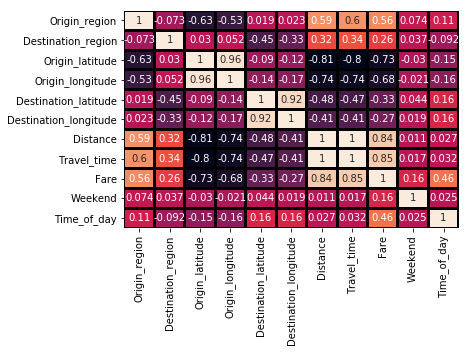

In [103]:
sns.heatmap(corr_type_0, cbar=False, linewidths=2, linecolor='black',annot=True, annot_kws={"size": 10})

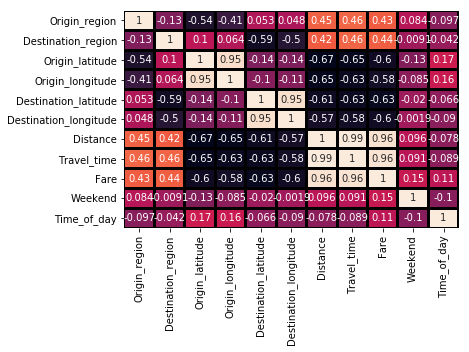

In [104]:
sns.heatmap(corr_type_1, cbar=False, linewidths=2, linecolor='black',annot=True, annot_kws={"size": 10})

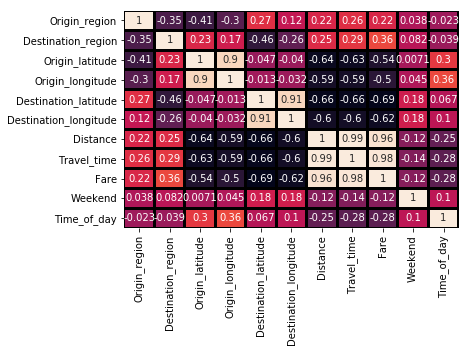

In [105]:
sns.heatmap(corr_type_2, cbar=False, linewidths=2, linecolor='black',annot=True, annot_kws={"size": 10})

### We now begin building our model to impute fare. I have build 3 models for each of the types. The models are built on distance, travel time, weekend and time of day as features.

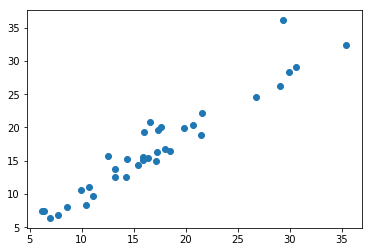

In [106]:
X_train, X_test, y_train, y_test = train_test_split(model_data_0[[ 'Distance','Travel_time', 'Weekend','Time_of_day']],
                                                   model_data_0['Fare'], test_size=0.2, random_state=10)
map(pd.np.shape,[X_train, X_test, y_train, y_test])
lm0 = LinearRegression()
lm0.fit(X_train, y_train)
Y_pred = lm0.predict(X_test)
plt.scatter(y_test, Y_pred)

MSE sqrt = 2.127808945016088
R2 squared value =0.9131061144723809


(array([1., 0., 1., 2., 2., 2., 6., 9., 9., 4.]),
 array([-6.7814516 , -5.7922096 , -4.8029676 , -3.8137256 , -2.8244836 ,
        -1.8352416 , -0.84599961,  0.14324239,  1.13248439,  2.12172639,
         3.11096839]),
 <a list of 10 Patch objects>)

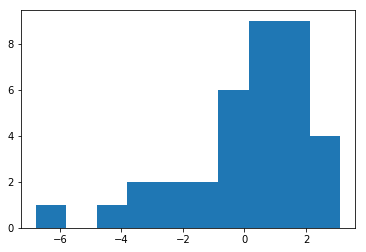

In [107]:
mse = np.sqrt(np.mean((y_test - Y_pred)**2))
print("MSE sqrt = "+str(mse))
r2 = r2_score(y_test, Y_pred)
print("R2 squared value ="+str(r2))
x=(y_test - Y_pred)
plt.hist(x)

### As seen, we have a high r2 value and a small MSE value. Our residuals are slightly skewed but overall it is a good model for prediction. Below, we subset our missing data where uber type is 1 and the fare is missing to pass it to our model to predict fares

In [108]:
predict_type0 = missing_data[missing_data['Fare'].isna()].loc[:, ['Uber_type','Distance','Travel_time' ,'Weekend', 'Time_of_day','Fare']]
predict_type0 = predict_type0[predict_type0['Uber_type'] == 0]
predict_type0 = predict_type0.drop(['Uber_type'],axis = 1)
predict_type0

,Distance,Travel_time,Weekend,Time_of_day,Fare
55,1610.0,376.44,0.0,0.0,NaN
63,5682.0,1382.34,0.0,1.0,NaN
86,8783.0,2978.76,1.0,1.0,NaN
93,47351.0,11500.98,0.0,2.0,NaN
102,11405.0,3163.74,0.0,2.0,NaN
109,15151.0,4917.48,0.0,2.0,NaN


In [109]:
predict_type0['Fare'] = lm0.predict(predict_type0.iloc[:, :-1])
predict_type0['Fare'] = round(predict_type0['Fare'],2)
predict_type0

,Distance,Travel_time,Weekend,Time_of_day,Fare
55,1610.0,376.44,0.0,0.0,5.01
63,5682.0,1382.34,0.0,1.0,11.42
86,8783.0,2978.76,1.0,1.0,17.29
93,47351.0,11500.98,0.0,2.0,33.38
102,11405.0,3163.74,0.0,2.0,19.35
109,15151.0,4917.48,0.0,2.0,22.79


### Now that we have our imputed values for the fare, we can put it back to our missing data which is done below.

In [110]:
for index, row in predict_type0.iterrows():
    missing_data.loc[index, 'Fare'] = row['Fare']

In [111]:
missing_data.isnull().sum()

ID                        0
Uber_type                 0
Origin_region             0
Destination_region        0
Origin_latitude           0
Origin_longitude          0
Destination_latitude      0
Destination_longitude     0
Distance                  0
Departure_date            0
Departure_time            0
Travel_time               0
Arrival_time              0
Fare                     11
Weekend                   0
Time_of_day               0
dtype: int64

### We perform the same task iteratively for the remaining uber types

MSE sqrt = 2.137889732120336
R squared value for the model is 0.9769605555634087


(array([2., 3., 9., 8., 6., 5., 2., 0., 0., 2.]),
 array([-3.53398702, -2.4852622 , -1.43653738, -0.38781257,  0.66091225,
         1.70963707,  2.75836188,  3.8070867 ,  4.85581152,  5.90453634,
         6.95326115]),
 <a list of 10 Patch objects>)

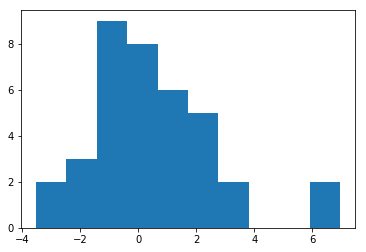

In [112]:
X_train, X_test, y_train, y_test = train_test_split(model_data_1[['Distance','Travel_time','Weekend','Time_of_day']],
                                                   model_data_1['Fare'], test_size=0.2, random_state=10)
map(pd.np.shape,[X_train, X_test, y_train, y_test])
lm1 = LinearRegression()
lm1.fit(X_train, y_train)
Y_pred = lm1.predict(X_test)
mse = np.sqrt(np.mean((y_test - Y_pred)**2))
print("MSE sqrt = "+str(mse))
r2 = r2_score(y_test, Y_pred)
print("R squared value for the model is " +str(r2))
x=(y_test - Y_pred)
plt.hist(x)

In [113]:
predict_type1 = missing_data[missing_data['Fare'].isna()].loc[:, ['Uber_type','Distance','Travel_time', 'Weekend', 'Time_of_day','Fare']]
predict_type1 = predict_type1[predict_type1['Uber_type'] == 1]
predict_type1 = predict_type1.drop(['Uber_type'],axis = 1)
predict_type1

,Distance,Travel_time,Weekend,Time_of_day,Fare
57,43709.0,10459.98,0.0,0.0,NaN
59,8586.0,2881.62,0.0,1.0,NaN
90,42924.0,10283.28,0.0,0.0,NaN
97,3852.0,993.48,0.0,0.0,NaN
104,5171.0,1260.48,0.0,0.0,NaN
106,4720.0,1180.62,0.0,2.0,NaN


In [114]:
predict_type1['Fare'] = lm1.predict(predict_type1.iloc[:, :-1])
predict_type1['Fare'] = round(predict_type1['Fare'],2)
predict_type1

,Distance,Travel_time,Weekend,Time_of_day,Fare
57,43709.0,10459.98,0.0,0.0,48.19
59,8586.0,2881.62,0.0,1.0,21.94
90,42924.0,10283.28,0.0,0.0,47.47
97,3852.0,993.48,0.0,0.0,9.41
104,5171.0,1260.48,0.0,0.0,10.49
106,4720.0,1180.62,0.0,2.0,19.50


In [115]:
for index, row in predict_type1.iterrows():
    missing_data.loc[index, 'Fare'] = row['Fare']

In [116]:
missing_data.isna().sum()

ID                       0
Uber_type                0
Origin_region            0
Destination_region       0
Origin_latitude          0
Origin_longitude         0
Destination_latitude     0
Destination_longitude    0
Distance                 0
Departure_date           0
Departure_time           0
Travel_time              0
Arrival_time             0
Fare                     5
Weekend                  0
Time_of_day              0
dtype: int64

MSE sqrt = 30.108257876738033
R squared value for the model is 0.9895420795603506


(array([1., 3., 0., 2., 1., 0., 4., 0., 0., 1.]),
 array([-4.45482828,  1.9177377 ,  8.29030369, 14.66286967, 21.03543565,
        27.40800163, 33.78056761, 40.15313359, 46.52569957, 52.89826556,
        59.27083154]),
 <a list of 10 Patch objects>)

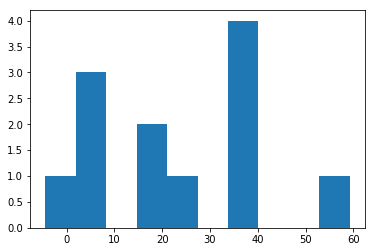

In [117]:
X_train, X_test, y_train, y_test = train_test_split(model_data_2[['Distance','Travel_time','Weekend','Time_of_day']],
                                                   model_data_2['Fare'], test_size=0.2, random_state=10)
map(pd.np.shape,[X_train, X_test, y_train, y_test])
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
Y_pred = lm2.predict(X_test)
mse = np.sqrt(np.mean((y_test - Y_pred)**2))
print("MSE sqrt = "+str(mse))
r2 = r2_score(y_test, Y_pred)
print("R squared value for the model is " +str(r2))
x=(y_test - Y_pred)
plt.hist(x)

### We obtain a high value for MSE compared to the other uber types as uber type 2 could be the most expensive compared to the other 2 (i.e. could be Uber black), and lesser amount of data compared to the other types contribute to a hgiher MSE value

In [118]:
predict_type2 = missing_data[missing_data['Fare'].isna()].loc[:, ['Uber_type','Distance', 'Travel_time','Weekend', 'Time_of_day','Fare']]
predict_type2 = predict_type2[predict_type2['Uber_type'] == 2]
predict_type2 = predict_type2.drop(['Uber_type'],axis = 1)
predict_type2

,Distance,Travel_time,Weekend,Time_of_day,Fare
67,9977.0,2834.64,1.0,1.0,NaN
75,8071.0,2172.60,0.0,0.0,NaN
91,9822.0,2995.92,0.0,0.0,NaN
105,5851.0,1537.20,0.0,0.0,NaN
108,6214.0,1464.24,0.0,2.0,NaN


In [119]:
predict_type2['Fare'] = lm2.predict(predict_type2.iloc[:, :-1])
predict_type2['Fare'] = round(predict_type2['Fare'],2)
predict_type2

,Distance,Travel_time,Weekend,Time_of_day,Fare
67,9977.0,2834.64,1.0,1.0,281.02
75,8071.0,2172.60,0.0,0.0,209.25
91,9822.0,2995.92,0.0,0.0,288.90
105,5851.0,1537.20,0.0,0.0,150.84
108,6214.0,1464.24,0.0,2.0,129.82


In [120]:
for index, row in predict_type2.iterrows():
    missing_data.loc[index, 'Fare'] = row['Fare']

In [121]:
missing_data.isna().sum()

ID                       0
Uber_type                0
Origin_region            0
Destination_region       0
Origin_latitude          0
Origin_longitude         0
Destination_latitude     0
Destination_longitude    0
Distance                 0
Departure_date           0
Departure_time           0
Travel_time              0
Arrival_time             0
Fare                     0
Weekend                  0
Time_of_day              0
dtype: int64

In [122]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 16 columns):
ID                       111 non-null object
Uber_type                111 non-null float64
Origin_region            111 non-null int64
Destination_region       111 non-null int64
Origin_latitude          111 non-null float64
Origin_longitude         111 non-null float64
Destination_latitude     111 non-null float64
Destination_longitude    111 non-null float64
Distance                 111 non-null float64
Departure_date           111 non-null datetime64[ns]
Departure_time           111 non-null object
Travel_time              111 non-null float64
Arrival_time             111 non-null object
Fare                     111 non-null float64
Weekend                  111 non-null float64
Time_of_day              111 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(2), object(3)
memory usage: 14.0+ KB


### Now that we have imputed our missing data for fare and type, and cross checked and found that there are no missing values, we have successfully imputed the missing data anomalies. We now proceed for outlier detection which is done below

In [123]:
missing_data = missing_data.drop(['Weekend','Time_of_day'],axis = 1)
missing_data.Departure_date = missing_data['Departure_date'].apply(lambda x: x.strftime("%Y-%m-%d"))
missing_data.columns = missing_old_cols
missing_data.isna().sum()

Unnamed: 0               0
Uber Type                0
Origin Region            0
Destination Region       0
Origin Latitude          0
Origin Longitude         0
Destination Latitude     0
Destination Longitude    0
Journey Distance(m)      0
Departure Date           0
Departure Time           0
Travel Time(s)           0
Arrival Time             0
Fare$                    0
dtype: int64

In [124]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 14 columns):
Unnamed: 0               111 non-null object
Uber Type                111 non-null float64
Origin Region            111 non-null int64
Destination Region       111 non-null int64
Origin Latitude          111 non-null float64
Origin Longitude         111 non-null float64
Destination Latitude     111 non-null float64
Destination Longitude    111 non-null float64
Journey Distance(m)      111 non-null float64
Departure Date           111 non-null object
Departure Time           111 non-null object
Travel Time(s)           111 non-null float64
Arrival Time             111 non-null object
Fare$                    111 non-null float64
dtypes: float64(8), int64(2), object(4)
memory usage: 12.2+ KB


In [125]:
missing_data.to_csv('29626889.missing_value_solution.csv',index=False)

# Outlier detection
#### The final section of this assignment deals with how to detect and fix the second type of coverage anomaly, i.e. outliers.

### We first begin with reading our outlier file to a dataframe

In [126]:
outliers_data = pd.read_csv('29626889_outliers.csv')

In [127]:
outliers_data.describe()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,47.000000,0.631579,5.189474,5.052632,-37.859306,144.917582,-37.836670,144.946297,16041.557895,4201.306105,41.994789
std,27.568098,0.653186,2.702618,2.424908,0.107283,0.116181,0.081107,0.091947,16737.099177,4024.260123,104.203614
min,0.000000,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,1027.000000,275.520000,3.800000
25%,23.500000,0.000000,3.000000,3.000000,-37.861835,144.905716,-37.824349,144.934051,5587.000000,1494.330000,11.302500
50%,47.000000,1.000000,6.000000,6.000000,-37.815834,144.946145,-37.813188,144.974418,8606.000000,2583.000000,17.910000
75%,70.500000,1.000000,7.000000,7.000000,-37.806539,144.983689,-37.804408,144.991774,13577.500000,4080.930000,27.432500
max,94.000000,2.000000,9.000000,9.000000,-37.773845,145.046450,-37.773803,145.046450,51032.000000,13204.980000,951.670000


In [128]:
outliers_data.isna().sum()

Unnamed: 0               0
Unnamed: 0.1             0
Uber Type                0
Origin Region            0
Destination Region       0
Origin Latitude          0
Origin Longitude         0
Destination Latitude     0
Destination Longitude    0
Journey Distance(m)      0
Departure Date           0
Departure Time           0
Travel Time(s)           0
Arrival Time             0
Fare$                    0
dtype: int64

In [129]:
outliers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 15 columns):
Unnamed: 0               95 non-null int64
Unnamed: 0.1             95 non-null object
Uber Type                95 non-null int64
Origin Region            95 non-null int64
Destination Region       95 non-null int64
Origin Latitude          95 non-null float64
Origin Longitude         95 non-null float64
Destination Latitude     95 non-null float64
Destination Longitude    95 non-null float64
Journey Distance(m)      95 non-null float64
Departure Date           95 non-null object
Departure Time           95 non-null object
Travel Time(s)           95 non-null float64
Arrival Time             95 non-null object
Fare$                    95 non-null float64
dtypes: float64(7), int64(4), object(4)
memory usage: 11.2+ KB


In [130]:
outliers_columns = list(outliers_data.columns.values)

### We rename the dataframe to make it easy for us to read the data

In [131]:
outliers_data.columns = ['X','ID','Uber_type', 'Origin_region', 'Destination_region','Origin_latitude','Origin_longitude','Destination_latitude','Destination_longitude','Distance','Departure_date','Departure_time','Travel_time','Arrival_time','Fare']

In [132]:
type0 = outliers_data[outliers_data['Uber_type']==0]
type1 = outliers_data[outliers_data['Uber_type']==1]
type2 = outliers_data[outliers_data['Uber_type']==2]

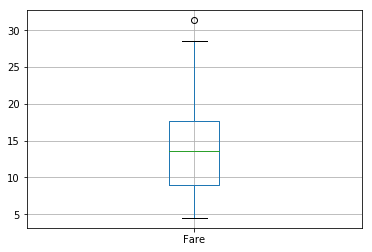

In [133]:
type0.boxplot(column= ['Fare'])

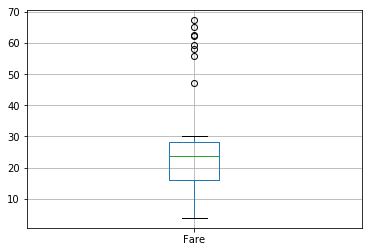

In [134]:
type1.boxplot(column= ['Fare'])

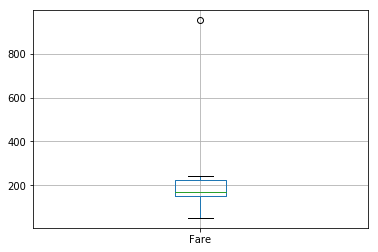

In [135]:
type2.boxplot(column= ['Fare'])

#### After subsetting our data into the subsequent uber types, from the boxplot we can conclude that there are some outliers in fare for all the types. Thus for fixing them, we use the linear regression model trained for missing data, to predict fares and compute the residuals. Firstly, we will compute the weekend and time of day categorical variables

In [136]:
outliers_data['Departure_date'] = pd.to_datetime(outliers_data.Departure_date)
outliers_data['Weekday'] = outliers_data['Departure_date'].dt.dayofweek 
outliers_data.loc[outliers_data['Weekday'] <= 4, 'Weekend'] = 0
outliers_data.loc[outliers_data['Weekday'] > 4, 'Weekend'] = 1
outliers_data = outliers_data.drop('Weekday',axis =1)
outliers_data.head()

,X,ID,Uber_type,Origin_region,Destination_region,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,Distance,Departure_date,Departure_time,Travel_time,Arrival_time,Fare,Weekend
0,0,ID1126275302,0,3,9,-37.816977,144.980081,-38.110916,144.654173,45026.0,2018-03-06,13:24:48,10882.56,16:26:10,23.46,0.0
1,1,ID1878466407,0,4,8,-37.808985,145.008867,-37.815834,145.046450,3666.0,2018-07-24,19:28:10,1211.64,19:48:21,4.51,0.0
2,2,ID3713727740,1,3,8,-37.816368,144.970923,-37.815834,145.046450,7084.0,2018-06-13,13:03:32,2078.88,13:38:10,16.92,0.0
3,3,ID1525827506,0,8,2,-37.807202,145.026637,-37.824424,144.936590,9378.0,2018-07-17,15:15:20,2421.42,15:55:41,11.01,0.0
4,4,ID1159038070,0,4,7,-37.808658,144.993337,-37.861835,144.905716,10573.0,2018-03-06,22:50:41,3495.42,23:48:56,17.56,0.0


In [137]:
outliers_data.loc[(outliers_data['Departure_time'] >= '06:00:00') & (outliers_data['Departure_time'] <= '11:59:59'),'Time_of_day'] = 0
outliers_data.loc[(outliers_data['Departure_time'] >= '12:00:00') & (outliers_data['Departure_time'] <= '20:59:59'), 'Time_of_day'] = 1
outliers_data.loc[(outliers_data['Departure_time'] >= '21:00:00') & (outliers_data['Departure_time'] <= '23:59:59'), 'Time_of_day'] = 2
outliers_data.loc[(outliers_data['Departure_time'] >= '00:00:00') & (outliers_data['Departure_time'] <= '05:59:59'), 'Time_of_day'] = 2


#### As we did for handling missing data, we will concatenate our outlier data and the combination of the cleaned data and non null data in missing data for predicting fares which is stored in the dataframe named model data

In [138]:
outliers_train_data = pd.concat([model_data,outliers_data],ignore_index = True)

C:\Users\Mohaad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


#### We subset the data based on uber types

In [139]:
outliers_train_type0 = outliers_train_data[outliers_train_data['Uber_type'] == 0]
outliers_train_type1 = outliers_train_data[outliers_train_data['Uber_type'] == 1]
outliers_train_type2 = outliers_train_data[outliers_train_data['Uber_type'] == 2]

#### we then subset data based on the features and predict fare for them. We then calculate the residual of our predicted value by using the below formula,
$$
\begin{align}
residuals = actual - predicted
\end{align}
$$

In [140]:
predict_type0 = outliers_data.loc[:, ['Uber_type','Distance','Travel_time', 'Weekend', 'Time_of_day','Fare']]
predict_type0 = predict_type0[predict_type0['Uber_type'] == 0]
predict_type0 = predict_type0.drop(['Uber_type'],axis = 1)
predict_type0['Computed_Fare'] = lm0.predict(predict_type0.iloc[:, :-1])
predict_type0['Computed_Fare'] = round(predict_type0['Computed_Fare'],2)
predict_type0['residual'] = predict_type0['Fare'] - predict_type0['Computed_Fare']


### We now plot a box plot for our residual values to see which of them probably is an outlier

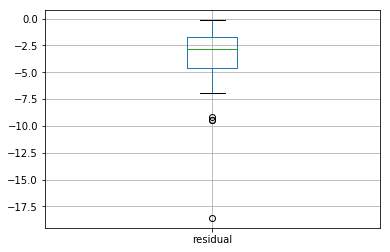

In [141]:
predict_type0.boxplot(column=['residual'])

#### As seen in the boxplot, we have a bunch of outliers. Therefore, we will fix them by removing using the inter-quartile range and whiskers method. We first calulate our inter-quantile range using the following formula,
$$
\begin{align}
IQR = Q3 - Q1 \\
upper whisker = Q3 + 1.5*IQR\\
lower whisker = Q1 - 1.5*IQR
\end{align}
$$
#### The residuals that lie between the upper and lower whisker won't be considered an outlier. While those residuals which lie outside the lower and upper whisker will be considered an outlier
#### The following code achieves this

In [142]:
for index,row in predict_type0.iterrows():
    iqr = (predict_type0.residual.quantile(0.75) - predict_type0.residual.quantile(0.25))
    upper_bound = predict_type0.residual.quantile(0.75) + 1.5*iqr 
    lower_bound = predict_type0.residual.quantile(0.25) - 1.5* iqr
    if not(lower_bound<row['residual'] < upper_bound):
        outliers_data = outliers_data.drop([index],axis = 0)
        predict_type0 = predict_type0.drop([index],axis = 0)

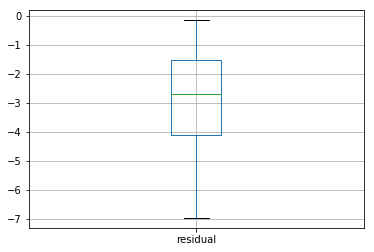

In [143]:
predict_type0.boxplot(column=['residual'])

#### Thus from the above box plot, it is clear that there are no residuals that lie beyond the upper and lower whisker. Thus we have dealt with our outliers for type 0. We repeat the same process for type 1 and type 2 as well.

In [144]:
predict_type1 = outliers_data.loc[:, ['Uber_type','Distance','Travel_time', 'Weekend', 'Time_of_day','Fare']]
predict_type1 = predict_type1[predict_type1['Uber_type'] == 1]
predict_type1 = predict_type1.drop(['Uber_type'],axis = 1)
predict_type1['Computed_Fare'] = lm1.predict(predict_type1.iloc[:, :-1])
predict_type1['Computed_Fare'] = round(predict_type1['Computed_Fare'],2)
predict_type1['residual'] = predict_type1['Fare'] - predict_type1['Computed_Fare']

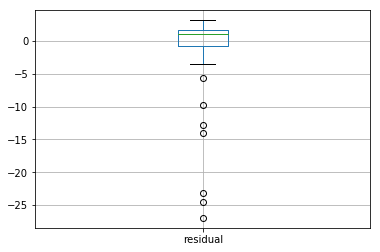

In [145]:
predict_type1.boxplot(column=['residual'])

In [146]:
for index,row in predict_type1.iterrows():
    iqr = (predict_type1.residual.quantile(0.75) - predict_type1.residual.quantile(0.25))
    upper_bound= predict_type1.residual.quantile(0.75) + 1.5*iqr 
    lower_bound= predict_type1.residual.quantile(0.25) - 1.5* iqr
    if not(lower_bound<row['residual'] < upper_bound):
        outliers_data = outliers_data.drop([index],axis = 0)
        predict_type1 = predict_type1.drop([index],axis = 0)

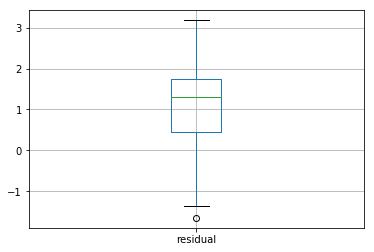

In [147]:
predict_type1.boxplot(column=['residual'])

In [148]:
predict_type2 = outliers_data.loc[:, ['Uber_type','Distance','Travel_time', 'Weekend', 'Time_of_day','Fare']]
predict_type2 = predict_type2[predict_type2['Uber_type'] == 2]
predict_type2 = predict_type2.drop(['Uber_type'],axis = 1)
predict_type2['Computed_Fare'] = lm2.predict(predict_type2.iloc[:, :-1])
predict_type2['Computed_Fare'] = round(predict_type2['Computed_Fare'],2)
predict_type2['residual'] = predict_type2['Fare'] - predict_type2['Computed_Fare']

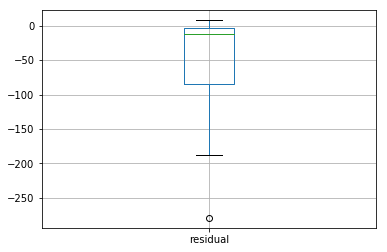

In [149]:
predict_type2.boxplot(column=['residual'])

In [150]:
for index,row in predict_type2.iterrows():
    iqr = (predict_type2.residual.quantile(0.75) - predict_type2.residual.quantile(0.25))
    upper_bound= predict_type2.residual.quantile(0.75) + 1.5*iqr 
    lower_bound= predict_type2.residual.quantile(0.25) - 1.5* iqr
    if not(lower_bound<row['residual'] < upper_bound):
        outliers_data = outliers_data.drop([index],axis = 0)
        predict_type2 = predict_type2.drop([index],axis = 0)

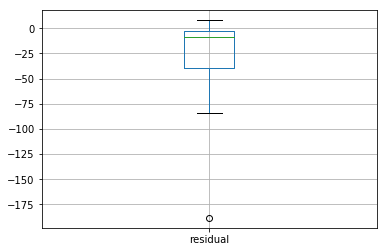

In [151]:
predict_type2.boxplot(column=['residual'])

### For type 2 however, we can see that even after running the code initially and removing our outliers, it hasn't dealt with removing all of them as plotting our residuals, we still find some outside the lower whisker. Therefore, we re-run the code to remove these outliers, till none of the residuals lie outside the whiskers

In [152]:
for index,row in predict_type2.iterrows():
    iqr = (predict_type2.residual.quantile(0.75) - predict_type2.residual.quantile(0.25))
    upper_bound= predict_type2.residual.quantile(0.75) + 1.5*iqr 
    lower_bound= predict_type2.residual.quantile(0.25) - 1.5* iqr
    if not(lower_bound<row['residual'] < upper_bound):
        outliers_data = outliers_data.drop([index],axis = 0)
        predict_type2 = predict_type2.drop([index],axis = 0)

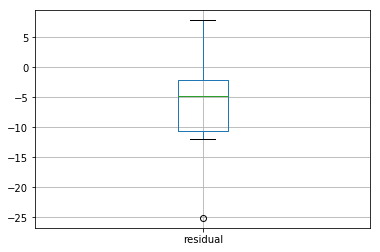

In [153]:
predict_type2.boxplot(column=['residual'])

In [154]:
for index,row in predict_type2.iterrows():
    iqr = (predict_type2.residual.quantile(0.75) - predict_type2.residual.quantile(0.25))
    upper_bound= predict_type2.residual.quantile(0.75) + 1.5*iqr 
    lower_bound= predict_type2.residual.quantile(0.25) - 1.5* iqr
    if not(lower_bound<row['residual'] < upper_bound):
        outliers_data = outliers_data.drop([index],axis = 0)
        predict_type2 = predict_type2.drop([index],axis = 0)

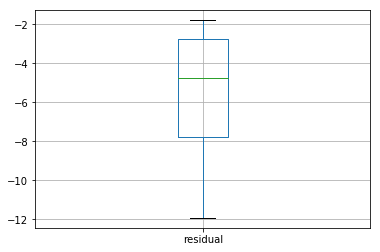

In [155]:
predict_type2.boxplot(column=['residual'])

#### Thus now, we don't have any residual lying outside the whiskers for all 3 types. We can confirm our outliers have been detected and removed. Thus our data is clean.

In [156]:
outliers_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 93
Data columns (total 17 columns):
X                        78 non-null int64
ID                       78 non-null object
Uber_type                78 non-null int64
Origin_region            78 non-null int64
Destination_region       78 non-null int64
Origin_latitude          78 non-null float64
Origin_longitude         78 non-null float64
Destination_latitude     78 non-null float64
Destination_longitude    78 non-null float64
Distance                 78 non-null float64
Departure_date           78 non-null datetime64[ns]
Departure_time           78 non-null object
Travel_time              78 non-null float64
Arrival_time             78 non-null object
Fare                     78 non-null float64
Weekend                  78 non-null float64
Time_of_day              78 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(4), object(3)
memory usage: 11.0+ KB


In [157]:
outliers_data = outliers_data.drop(['Weekend','Time_of_day'],axis = 1)
outliers_data.Departure_date = outliers_data['Departure_date'].apply(lambda x: x.strftime("%Y-%m-%d"))

In [158]:
outliers_data.columns = outliers_columns


In [159]:
outliers_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 93
Data columns (total 15 columns):
Unnamed: 0               78 non-null int64
Unnamed: 0.1             78 non-null object
Uber Type                78 non-null int64
Origin Region            78 non-null int64
Destination Region       78 non-null int64
Origin Latitude          78 non-null float64
Origin Longitude         78 non-null float64
Destination Latitude     78 non-null float64
Destination Longitude    78 non-null float64
Journey Distance(m)      78 non-null float64
Departure Date           78 non-null object
Departure Time           78 non-null object
Travel Time(s)           78 non-null float64
Arrival Time             78 non-null object
Fare$                    78 non-null float64
dtypes: float64(7), int64(4), object(4)
memory usage: 9.8+ KB


In [160]:
outliers_data.to_csv('29626889_outliers_solution.csv',index=False)

![alt text](thankyou.jpg "Title")
